# 気象庁が公開している地震データを解析する

例えば、過去の地震データは  
https://www.data.jma.go.jp/svd/eqev/data/bulletin/shindo.html  
に公開されている。

ここでは、それをダウンロードし、ファイル内容を解析して、震源地のマップやマグニチュードごとの頻度をプロットすることを目指す。

In [1]:
import urllib  # ファイルのダウンロードに用いる
import zipfile  # Zipファイルの解凍に用いる
import datetime  # 日時データを取り扱うために用いる

import numpy as np
import matplotlib.pyplot as plt

## データの例

2019年の地震データは以下のURLに公開されている。ダウンロードして、どのようなファイル構成になっているか見てみよう

https://www.data.jma.go.jp/svd/eqev/data/bulletin/data/shindo/i2019.zip

In [2]:
url = 'https://www.data.jma.go.jp/svd/eqev/data/bulletin/data/shindo/i2019.zip'

In [3]:
# ファイルをダウンロードするコマンド。ファイルをダウンロードして、i2019.zipの名前で保存する
urllib.request.urlretrieve(url, filename='i2019.zip')

('i2019.zip', <http.client.HTTPMessage at 0x7f41d9fc66d0>)

In [4]:
# ダウンロードしたZipファイルを展開する
with zipfile.ZipFile('i2019.zip', 'r') as zip_ref:
    zip_ref.extract('i2019.dat')

## ファイルフォーマット

ファイルのフォーマット（構成）は以下のページに公開されている。  
https://www.data.jma.go.jp/svd/eqev/data/bulletin/data/shindo/format_j.txt  
ここでは、地震発生位置・震源地・マグニチュードのみを扱うことにする

In [5]:
def read_earthquake_data(file):
    '''
    地震データを読み込むプログラム

    日時、緯度、経度、マグニチュードをリストとして返す
    '''
    # 展開したファイルを開く。ここで公開されているファイルには`shift_jist`というエンコーディングが使われているので注意する。
    # エンコーディングについては各自調べること
    with open(file, 'r', encoding='shift_jis') as f:
        lines = f.readlines()

    dates = []
    latitudes = []
    longtitudes = []
    magnitudes = []
    for line in lines:
        if line[0] in 'ABCD':  # 震源レコード
            # date
            year = int(line[1:5])
            month = int(line[5:7])
            day = int(line[7:9])
            hour = int(line[9:11])
            min = int(line[11:13])
            try:
                sec = int(line[13:15])
            except ValueError:
                sec = 0
            # location
            latitude_deg = int(line[21:24])
            latitude_min = float(line[24:28]) * 0.01
            longtitude_deg = int(line[33:36])
            longtitude_min = float(line[36:40]) * 0.01
            # magnitude
            magnitude = line[52:54]
            try: 
                magnitude = float(magnitude) * 0.1
                magnitudes.append(float(magnitude))
                dates.append(datetime.datetime(year, month, day, hour, min, sec))
                latitudes.append(latitude_deg + latitude_min / 60.0)
                longtitudes.append(longtitude_deg + longtitude_min / 60.0)
            except ValueError:
                pass
    return dates, latitudes, longtitudes, magnitudes

In [6]:
dates, latitudes, longtitudes, magnitudes = read_earthquake_data('i2019.dat')

Text(0, 0.5, 'magnitude')

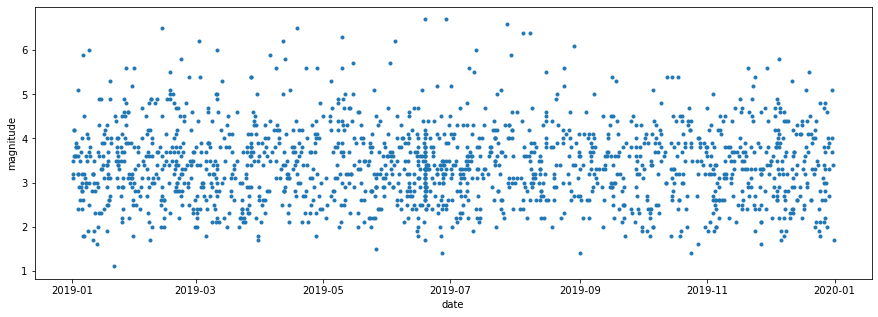

In [7]:
# マグニチュードを日時の関数としてプロットしてみる
plt.figure(figsize=(15, 5))
plt.plot(dates, magnitudes, '.')
plt.xlabel('date')
plt.ylabel('magnitude')

### 地震の大きさと頻度

Text(0, 0.5, 'frequency')

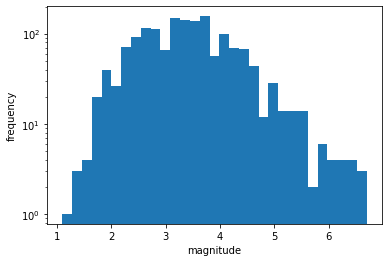

In [8]:
plt.hist(magnitudes, bins=31)
plt.yscale('log')
plt.xlabel('magnitude')
plt.ylabel('frequency')

## 2005年からのファイルを全てダウンロード

In [9]:
dates_all, latitudes_all, longtitudes_all, magnitudes_all = [], [], [], []
for year in range(2005, 2020):
    # 文字列に対する.format()関数を行うことで、文字列中の{}の部分に値を代入することができる
    url = 'https://www.data.jma.go.jp/svd/eqev/data/bulletin/data/shindo/i{}.zip'.format(year)
    # ファイルをダウンロードし、ダウンロードしたZipファイルを展開する
    '''
    ここに続きのプログラムを入力する
    '''

In [ ]:
# マグニチュードを日時の関数としてプロットしてみる
plt.figure(figsize=(15, 5))
plt.plot(dates_all, magnitudes_all, '.', markersize=2)
plt.xlabel('date')
plt.ylabel('magnitude')

## マグニチュードと頻度の関係をプロットする

In [ ]:
plt.hist(magnitudes, bins=31)
plt.yscale('log')
plt.xlabel('magnitude')
plt.ylabel('frequency')

## 地震発生位置をプロットする

地図をプロットできるパッケージ folium を使う

参考  
https://newtechnologylifestyle.net/python_gpsprot/



In [10]:
!pip install folium

In [11]:
import folium

In [12]:
map = folium.Map(location=[latitudes[0], longtitudes[0]], zoom_start=4)
# 最初の100個の地震をプロットする
for i in range(100):
    folium.Marker(location=[latitudes[i], longtitudes[i]]).add_to(map)

In [13]:
map

## 課題（提出不要）

+ 2019年以外のデータもダウンロードし、2011年の東北地方太平洋沖地震の大きさやその影響を調べよ
+ 各地方ごとの地震の頻度を比べる  
  九州・四国・中国・近畿・中部・関東・東北・北海道など

+ 地震の頻度は、規模 M に対して $\rho(M) \propto M^{-\alpha}$ というふうにべき乗分布で表されることが知られている。ここでマグニチュード$m$は $m = \log_{10} M + C$  ($C$は定数)として表される。べき指数 $α$ を上記のデータから求めてみよ。

## その他の応用

+ 重力波データの解析  
https://www.gw-openscience.org/GW150914data/GW150914_tutorial.html

+ 太陽フレアの観測データ    
https://www.ngdc.noaa.gov/stp/solar/solarflares.html  
https://www.swpc.noaa.gov/products/alerts-watches-and-warnings  
ftp://ftp.swpc.noaa.gov/pub/indices/events/  

+ neuralnetwork playground  
https://playground.tensorflow.org/